In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\Rock_\Anaconda3\envs\LD\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
rich_big = 'Rich'
#rich_big = 'Big'

In [4]:
def load_photos(directory):
    images = []
    labels = []
    names = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = int(name.split('_')[0])
        names.append('_'.join(name.split('_')[1:]))
        labels.append(value)
        images.append(image)
    return images, labels, names
# load images from both train and test groups
directory = '../data/'+rich_big+'Dataset/Train'
images, labels, names = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/'+rich_big+'Dataset/Val'
images_val, labels_val, names_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)
print(len(names))

Loaded Images and labels for training: 2343
Loaded Images and labels for validation: 304
2343


In [5]:
def load_photos_2(directory):
    images = []
    labels = []
    names=[]
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        names.append('_'.join(name.split('_')[1:]))
        value = 0 if value == '0' else 1
        labels.append(value)
        images.append(image)
    return images, labels, names

directory_2 = '../data/'+rich_big+'Dataset-anticipation/Train'
images_2, labels_2, names_2 = load_photos(directory_2)
nb_images_2 = len(images_2)
print('Loaded Images and labels for training: %d' % nb_images_2)
directory = '../data/'+rich_big+'Dataset-anticipation/Val'
images_val_2, labels_val_2, names_val_2 = load_photos(directory_2)
nb_images_val_2 = len(images_val_2)
print('Loaded Images and labels for validation: %d' % nb_images_val_2)
print(len(names_2))

Loaded Images and labels for training: 1178
Loaded Images and labels for validation: 1178
1178


In [6]:
new_labels_speed=[]
for elem in names:
    if elem in names_2:
        idx = names_2.index(elem)
        new_labels_speed.append(labels_2[idx])
    else:
        new_labels_speed.append(0)
        
new_labels_val_speed=[]
for elem in names_val:
    if elem in names_val_2:
        idx = names_val_2.index(elem)
        new_labels_val_speed.append(labels_val_2[idx])
    else:
        new_labels_val_speed.append(0)

In [7]:
print(len(labels), len(new_labels_speed),len(new_labels_val_speed), len(labels_val))

2343 2343 304 304


In [8]:
#normalise datas
images = np.array(images)
images = images[:, 40:, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:, :, :]
images_val /= 255

((2343, 88, 160, 3), <matplotlib.image.AxesImage at 0x27da8087a90>)

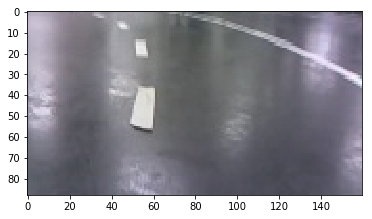

In [9]:
images.shape, plt.imshow(images[40])


In [10]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)
labels_2 = np.array(new_labels_speed)
labels_val_2 = np.array(new_labels_val_speed)

In [11]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)
labelsd_2 = pd.get_dummies(labels_2)

In [12]:
labelsd_2

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [13]:
#convert to np.array again
labelsd = np.array(labelsd)
labelsd_2 = np.array(labelsd_2)

In [14]:
#check if OK
labels[1], labelsd[1]
labels_2[1], labelsd_2[1]

(0, array([1, 0], dtype=uint8))

In [15]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [16]:
#from keras.models import load_model
#model = load_model('model-BigDataset.h5')

In [27]:
K.clear_session()

img_in = Input(shape=(88, 160, 3), name='img_in')

x = img_in

x = Convolution2D(24, (5,5), strides=(2,2), activation='relu')(x)       # 24 features, 5 pixel x 5 pixel kernel (convolution, feauture) window, 2wx2h stride, relu activation
x = Convolution2D(32, (5,5), strides=(2,2), activation='relu')(x)       # 32 features, 5px5p kernel window, 2wx2h stride, relu activatiion
x = Convolution2D(64, (5,5), strides=(2,2), activation='relu')(x)       # 64 features, 5px5p kernal window, 2wx2h stride, relu
x = Convolution2D(64, (3,3), strides=(2,2), activation='relu')(x)       # 64 features, 3px3p kernal window, 2wx2h stride, relu

# Possibly add MaxPooling (will make it less sensitive to position in image).  Camera angle fixed, so may not to be needed

x = Flatten(name='flattened')(x)                                        # Flatten to 1D (Fully connected)
x = Dense(100, activation='relu')(x)                                    # Classify the data into 100 features, make all negatives 0
x = Dropout(.1)(x)                                                      # Randomly drop out (turn off) 10% of the neurons (Prevent overfitting)
x = Dense(75, activation='relu')(x)                                     # Classify the data into 50 features, make all negatives 0
x = Dropout(.1)(x)                                                      # Randomly drop out 10% of the neurons (Prevent overfitting)

#categorical output
out = Dense(3, activation='softmax')(x)
out_2 = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out, out_2])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [28]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 88, 160, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 42, 78, 24)   1824        img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 19, 37, 32)   19232       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 8, 17, 64)    51264       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [29]:
h = model.fit(images, [labelsd, labelsd_2], batch_size=32, epochs=50, verbose=1)

Epoch 1/50
2343/2343 [==============================] - 12s 5ms/step - loss: 1.5257 - dense_3_loss: 1.1106 - dense_4_loss: 0.4152 - dense_3_acc: 0.3837 - dense_4_acc: 0.8698
Epoch 2/50
2343/2343 [==============================] - 11s 5ms/step - loss: 1.4711 - dense_3_loss: 1.0884 - dense_4_loss: 0.3828 - dense_3_acc: 0.3956 - dense_4_acc: 0.8779
Epoch 3/50
2343/2343 [==============================] - 12s 5ms/step - loss: 1.3302 - dense_3_loss: 0.9700 - dense_4_loss: 0.3602 - dense_3_acc: 0.5361 - dense_4_acc: 0.8720
Epoch 4/50
2343/2343 [==============================] - 12s 5ms/step - loss: 0.9719 - dense_3_loss: 0.6593 - dense_4_loss: 0.3126 - dense_3_acc: 0.7384 - dense_4_acc: 0.8664
Epoch 5/50
2343/2343 [==============================] - 12s 5ms/step - loss: 0.8255 - dense_3_loss: 0.5390 - dense_4_loss: 0.2865 - dense_3_acc: 0.7810 - dense_4_acc: 0.8779
Epoch 6/50
2343/2343 [==============================] - 12s 5ms/step - loss: 0.7637 - dense_3_loss: 0.4832 - dense_4_loss: 0.2805 

2343/2343 [==============================] - 13s 5ms/step - loss: 0.0170 - dense_3_loss: 0.0085 - dense_4_loss: 0.0085 - dense_3_acc: 0.9979 - dense_4_acc: 0.9970: 3s - loss: 0.0124 - dense_3_loss: 0.0054 - dense_4_loss: 0.0070 - dense_3_acc: 0.99
Epoch 42/50
2343/2343 [==============================] - 13s 5ms/step - loss: 0.0375 - dense_3_loss: 0.0237 - dense_4_loss: 0.0137 - dense_3_acc: 0.9936 - dense_4_acc: 0.9940
Epoch 43/50
2343/2343 [==============================] - 13s 6ms/step - loss: 0.0259 - dense_3_loss: 0.0117 - dense_4_loss: 0.0141 - dense_3_acc: 0.9974 - dense_4_acc: 0.9974
Epoch 44/50
2343/2343 [==============================] - 14s 6ms/step - loss: 0.0132 - dense_3_loss: 0.0093 - dense_4_loss: 0.0039 - dense_3_acc: 0.9983 - dense_4_acc: 0.9991 ETA: 9s - loss: 0.0098 - dense_3_loss: 0.0092 - dense_4_loss: 5
Epoch 45/50
2343/2343 [==============================] - 14s 6ms/step - loss: 0.0101 - dense_3_loss: 0.0076 - dense_4_loss: 0.0025 - dense_3_acc: 0.9983 - dense_4_

KeyboardInterrupt: 

In [30]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
#print(historydf)
historydf.plot(ylim=(0,1))

NameError: name 'h' is not defined

In [31]:
# Get predictions
all_preds = model.predict(images_val)
#print(all_preds[0])
#print(all_preds[1])

# Check predictions
idx = [np.argmax(line) for line in all_preds[0]]
idx_2 = [np.argmax(line) for line in all_preds[1]]
#print("idx",idx)
#print("idx_2",idx_2)

compare = [1 if hyp == ref-1 else 0 for (hyp,ref) in zip(idx, labels_val)]
compare_2 = [1 if hyp == ref-1 else 0 for (hyp,ref) in zip(idx, labels_val)]

idx_error = [i  for i,elem in enumerate(compare) if elem==0]
error =[names[i]  for i,elem in enumerate(compare) if elem==0]
error_2 =[names[i]  for i,elem in enumerate(compare_2) if elem==0]
set_error=error+[elem for elem in error_2 if elem not in error]
#print(idx_error,error, error_2, set_error)
#print(len(error), len(error_2), len(set_error))
#print(compare, "\n"+str(compare_2),sum(compare), sum(compare_2)) 
print(round(sum(compare)/len(idx)*100,2),round(sum(compare_2)/len(idx)*100,2))


86.18 86.18


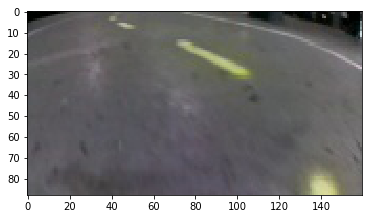

In [32]:
plt.imshow(images_val[53])

In [33]:
import math
i = 0
res = 0
for value in idx:
    if value +1 != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.13815789473684212

In [34]:
model.save('model-MHRace_3.h5')